# COMP7404 - Assignment 4

## Part A: Conceptual Questions

Solve the following questions by hand. You can write your answer on a seperate paper (submit as *.pdf) or type it below and submit together with Part B as a single *.ipynb file.


### A1
Consider a Perceptron with 2 inputs and 1 output. Let the weights of the Perceptron be $w_1 = 1$ and $w_2 = 1$ and let the bias be $w_0 = -1.5$. Calculate the output of the following inputs:(0, 0), (1, 0), (0, 1), (1, 1)

*Your answer here*



### A2
Define a perceptron for the following logical functions: AND, NOT, NAND, NOR


*Your answer here*

### A3
The parity problem returns 1 if the number of inputs that are 1 is even, and 0 otherwise. Can a perceptron learn this problem for 3 inputs? 


*Your answer here*

### A4
Suppose that the following are a set of point in two classes:

*   Class1: $(1, 1), (1, 2), (2, 1)$
*   Class2: $(0, 0), (1, 0), (0, 1)$

Plot them and find the optimal separating line. What are the support vectors, and what is the meaning?


*Your answer here*

### A5
Suppose that the probability of five events are $P(first) = 0.5, P(second) = P(third) = P(fourth) = P(fifth) = 0.125$. Calculate the entropy and write down in words what this means. 


*Your answer here*

### A6
Design a decision tree that computes the logical AND function. How does it compare to the Perceptron solution?

*Your answer here*

### A7
Turn the following politically incorrect data into a decision tree to classify which attributes make a person attractive, and then extract the rules. Use the Gini Impurity.

| Height  | Hair  | Eyes  | Attractive?  |
|:-:|:-:|:-:|:-:|
| Small  | Blonde  | Brown  | No  |
| Tall  | Dark  | Brown  | No  |
| Tall  | Blonde  | Blue  | Yes  |
| Tall  | Dark  | Blue  | No  |
| Small  | Dark  | Blue  | No  |
| Tall  | Red  | Blue  | Yes  |
| Tall  | Blonde  | Brown  | No  |
| Small  | Blonde  | Blue  | Yes  |


*Your answer here*

### A8
Suppose we collect data for a group of students in a postgraduate machine learning class with features $x_1$ = hours studies, $x_2$ = undergraduate GPA and label $y$ = receive an A. We fit a logistic regression and produce estimated weights as follows: $w_0 = -6$, $w_1 = 0.05$, $w_2 = 1$.

1.  Estimate the probability that a student who studies for 40h and has an undergraduate GPA of 3.5 gets an A in the class
2.  How many hours would the student in part 1. need to study to have a 50% chance of getting an A in the class?

*Your answer here*

### A9
Suppose that we take a data set, divide it into equally-sized training and test sets, and then try out two different classification procedures. First we use logistic regression and get an error rate of 20% on the training data and 30% on the test data. Next we use 1-nearest neighbors (i.e., K=1) and get an average error rate (averaged over both test and training data sets) of 18%. Based on these results, which method should we prefer to use for classification of new observations? Why?

*Your answer here*

### A10

Suppose the features in your training set have very different scales. Which algorithms discussed in class might suffer from this, and how? What can you do about it?


*Your answer here*

### A11


If your AdaBoost ensemble underfits the training data, which hyperparameters should you tweak and how?

*Your answer here*

### A12

What is the benefit of out-of-bag evaluation?

*Your answer here*

### A13

What is the difference between hard and soft voting classifiers?

*Your answer here*

## Part B: Applied Questions

Solve the following questions by implementing solutions in code.

### B1
Consider the following Perceptron code.

In [122]:
import numpy as np

class Perceptron(object):
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [123]:
import pandas as pd

data_src = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(data_src, header=None)

df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<Figure size 800x500 with 0 Axes>

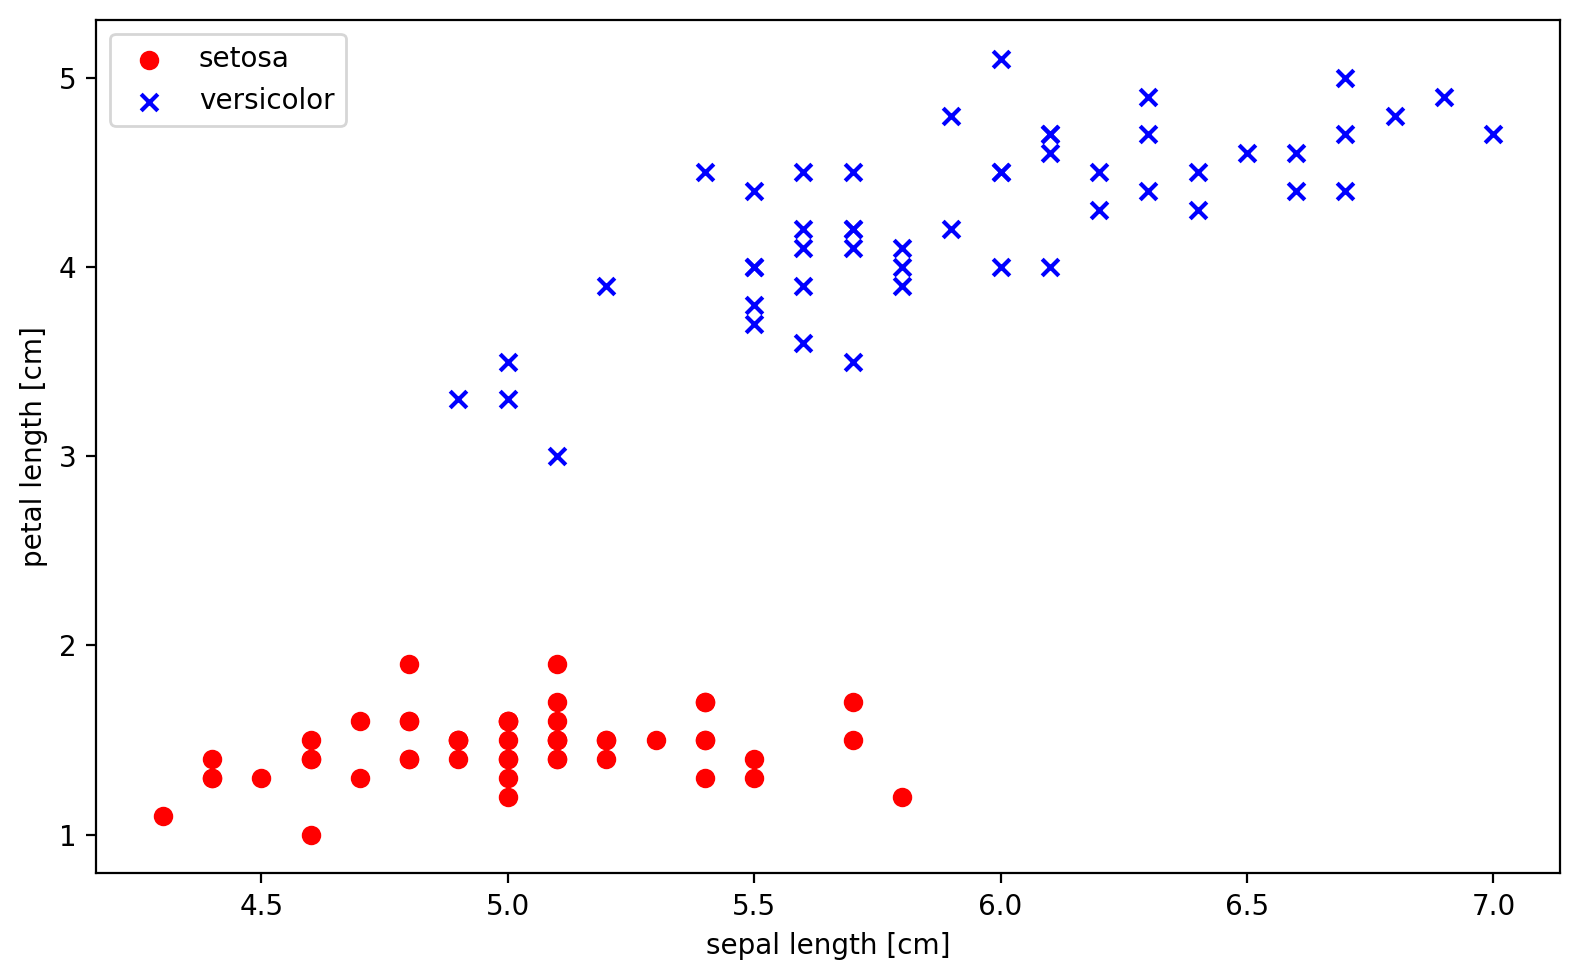

In [124]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import numpy as np

# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [125]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn = ppn.fit(X, y)

In [126]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):
    markers = ('s', 'v', 'o')
    colors = ['red', 'blue', 'green']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    #
    print(np.array([xx1.ravel(), xx2.ravel()]).T.shape)
    #print(Z.shape)
    #
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')

As shown in function plot_decision_regions, the decision regions can be visualized by dense sampling via meshgrid. However, if the grid resolution is not enough, as artificially set below, the boundary will appear inaccurate.

Implement function plot_decision_boundary below to analytically compute and plot the decision boundary.

In [127]:
def plot_decision_boundary(X, y):
    point_1 = [0, -ppn.w_[0] / ppn.w_[2]]
    point_2 = [-ppn.w_[0] / ppn.w_[1], 0]
    slope = (point_2[1] - point_1[1]) / (point_2[0] - point_1[0])
    y_intercept = -ppn.w_[0] / ppn.w_[2]
    x_interval = [X[:, 0].min() - 1, X[:, 0].max() + 1]
    y_interval = [x * slope + y_intercept for x in x_interval]

    # x2_interval = [X[:, 1].min() - 1, X[:, 1].max() + 1]

    plt.plot(x_interval, y_interval, color='green', linewidth=4, label='boundary')

(2867, 2)


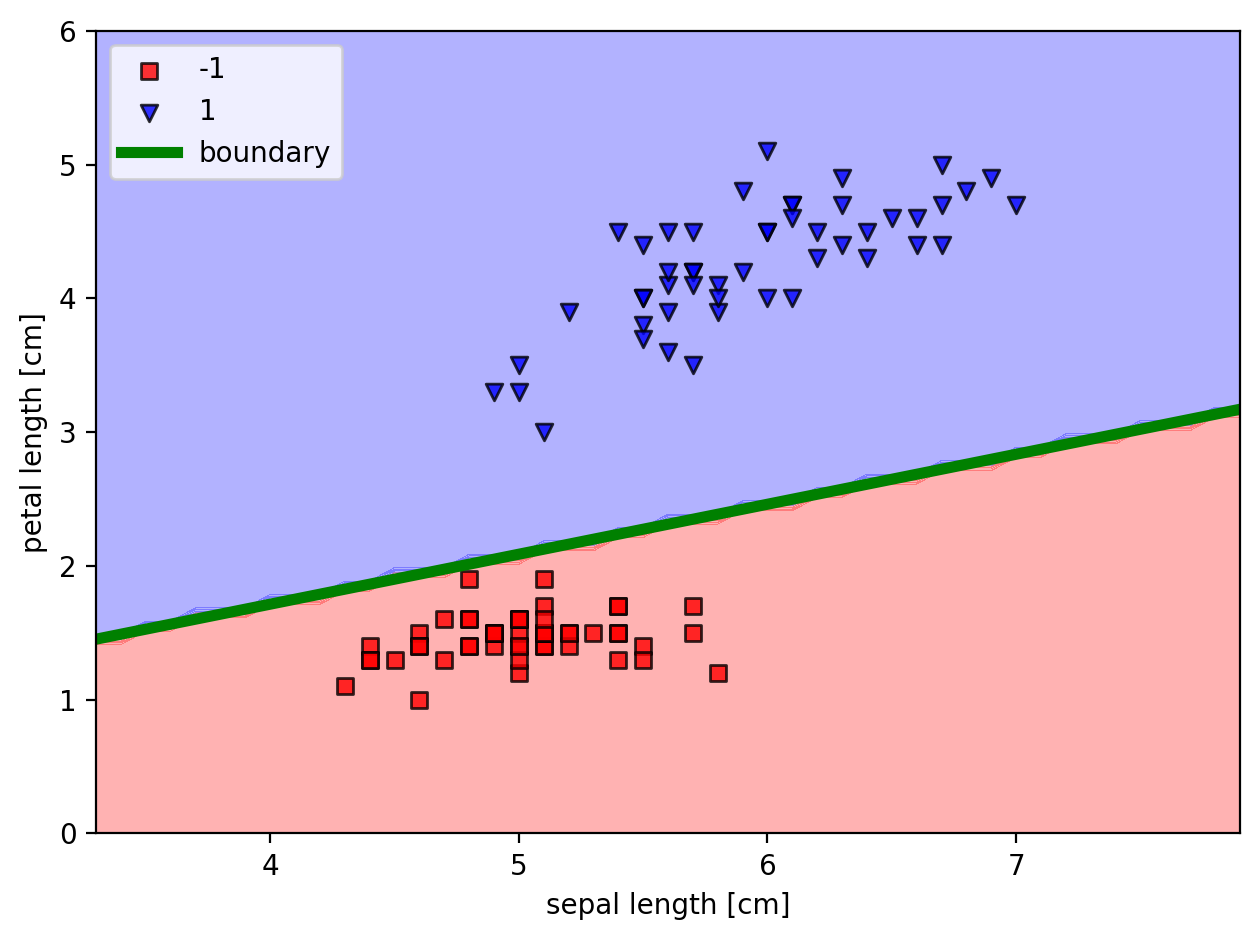

In [128]:
low_res = 0.1 # intentional for this exercise
plot_decision_regions(X, y, classifier=ppn, resolution=low_res)
plot_decision_boundary(X, y)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### B2

In class we applied different scikit-learn classifers for the Iris data set.

In this question, we will apply the same set of classifiers over a different data set: hand-written digits.
Please write down the code for different classifiers, choose their hyper-parameters, and compare their performance via the accuracy score as in the Iris dataset.
Which classifier(s) perform(s) the best and worst, and why?

The classifiers include:
* perceptron
* logistic regression
* SVM
* decision tree
* random forest
* KNN

The dataset is available as part of scikit learn, as follows.

In [129]:
from sklearn.datasets import load_digits
digits = load_digits()

X = digits.data # training data
y = digits.target # training label

print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


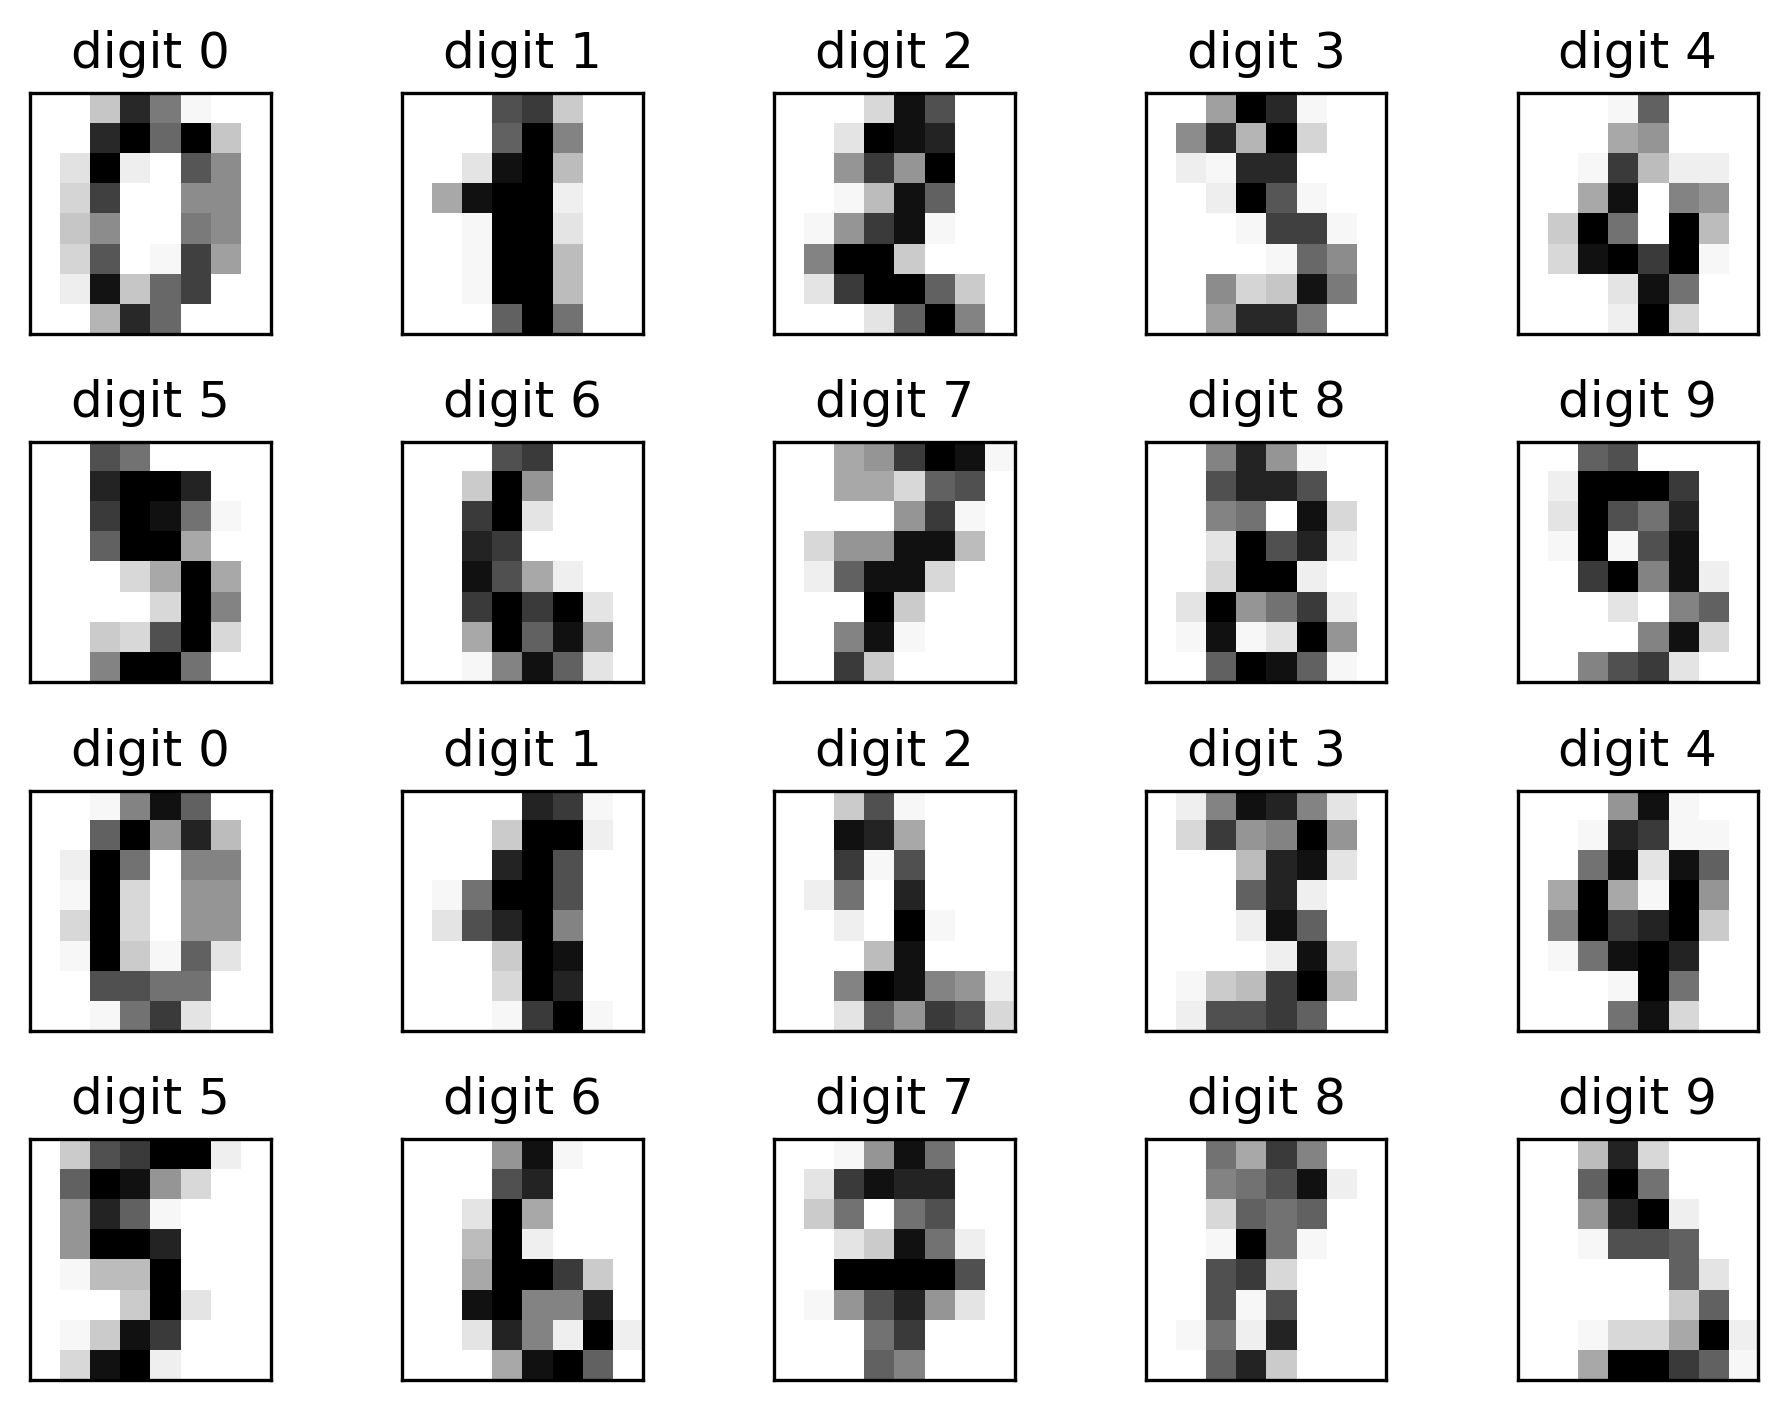

In [130]:
import matplotlib.pyplot as plt
import pylab as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
num_rows = 4
num_cols = 5
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, sharex=True, sharey=True)
ax = ax.flatten()
for index in range(num_rows*num_cols):
    img = digits.images[index]
    label = digits.target[index]
    ax[index].imshow(img, cmap='Greys', interpolation='nearest')
    ax[index].set_title('digit ' + str(label))
ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Date Preprocessing

Hint: Divide training and test data set and apply other techinques we have learned if needed.

In [131]:
#Your code here
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA   
from sklearn.pipeline import make_pipeline
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

Classifier #1 Perceptron

In [132]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import     confusion_matrix

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)   
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}') 



Accuracy: 95.28%
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  1 31  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  2  0  0  2  1  0  0 25  0]
 [ 0  0  0  0  1  1  0  0  2 36]]


Classifier #2 Logistic Regression

In [133]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train, y_train)
y_pred = lg.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 96.94%
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


d:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classifier #3 SVM

In [134]:
#Your code, including traing and testing, to observe the accuracies.

from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')


Accuracy: 97.78%
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]


Classifier #4 Decision Tree

In [135]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')


Accuracy: 83.33%
Confusion Matrix:
[[29  0  0  0  2  1  0  1  0  0]
 [ 0 21  2  0  2  0  0  1  1  1]
 [ 0  0 26  3  2  0  0  1  1  0]
 [ 0  0  1 29  0  0  0  1  3  0]
 [ 0  0  0  0 42  1  2  1  0  0]
 [ 0  0  0  0  2 39  2  0  0  4]
 [ 0  0  0  0  1  0 34  0  0  0]
 [ 0  0  1  2  1  0  0 30  0  0]
 [ 1  2  0  2  2  1  0  0 20  2]
 [ 0  2  0  3  1  1  0  3  0 30]]


Classifer #5 Random Forest

In [136]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier() 
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')   
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}') 


Accuracy: 98.06%
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  0  0  1  0 39]]


Classifier #6 KNN

In [137]:
#Your code, including traing and testing, to observe the accuracies.
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3) 
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}') 


Accuracy: 98.33%
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  1  1  0  0  0 37]]


### B3
Build a spam classifier:



*   Download examples of spam and ham from Apache SpamAssassin’s public datasets.
*   Unzip the datasets and familiarize yourself with the data format.
*   Split the datasets into a training set and a test set.
*   Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector that indicates the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
*   You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this).

*   Finally, try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

In [138]:
import os
from  urllib.request import urlretrieve
import tarfile  
import shutil  
import numpy as np
import pandas as pd
import glob

dataset='dataset'
TAR_DIR=os.path.join(dataset,'tar')

spam_url='https://spamassassin.apache.org/old/publiccorpus/20050311_spam_2.tar.bz2'
easy_ham_url='https://spamassassin.apache.org/old/publiccorpus/20030228_easy_ham_2.tar.bz2'
hard_ham_url='https://spamassassin.apache.org/old/publiccorpus/20030228_hard_ham.tar.bz2'

In [139]:

def download_dataset(url: str):
    if not os.path.isdir(TAR_DIR):
        os.makedirs(TAR_DIR)
    filename = url.rsplit('/', 1)[-1]
    # print(filename)
    tarpath = os.path.join(TAR_DIR, filename)
    # print(tarpath)
    urlretrieve(url, tarpath)
    with tarfile.open(tarpath) as tar:
        # print(tar.getnames())
        dirname = os.path.join(dataset, tar.getnames()[0])
        # print(tar.getnames())
        if os.path.isdir(dirname):
            shutil.rmtree(dirname)
        tar.extractall(path=dataset)
        cmds_path = os.path.join(dirname, 'cmds')
        if os.path.isfile(cmds_path):
            os.remove(cmds_path)
    return dirname
spam_dir = download_dataset(spam_url)
easy_ham_dir = download_dataset(easy_ham_url)
hard_ham_dir = download_dataset(hard_ham_url)

C:\Users\23318\AppData\Local\Temp\ipykernel_21736\670364094.py:15: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(path=dataset)


In [140]:
def load_dataset(dirpath):
    files = []
    filepaths = glob.glob(dirpath + '/*')
    for path in filepaths:
        with open(path, 'r', encoding="ISO-8859-1") as f:
            files.append("".join(f.readlines()))
    return files

In [141]:
spam = load_dataset(spam_dir)
easy_ham = load_dataset(easy_ham_dir)
hard_ham = load_dataset(hard_ham_dir)
# create the full dataset
X = spam + easy_ham + hard_ham
y = np.concatenate((np.ones(len(spam)), np.zeros(len(easy_ham) + len(hard_ham))))
"easy ham: {}, hard ham: {}, spam: {}".format(len(easy_ham), len(hard_ham), len(spam))


'easy ham: 1400, hard ham: 250, spam: 1396'

In [142]:
X[0]

'From ilug-admin@linux.ie  Tue Aug  6 11:51:02 2002\nReturn-Path: <ilug-admin@linux.ie>\nDelivered-To: yyyy@localhost.netnoteinc.com\nReceived: from localhost (localhost [127.0.0.1])\n\tby phobos.labs.netnoteinc.com (Postfix) with ESMTP id 9E1F5441DD\n\tfor <jm@localhost>; Tue,  6 Aug 2002 06:48:09 -0400 (EDT)\nReceived: from phobos [127.0.0.1]\n\tby localhost with IMAP (fetchmail-5.9.0)\n\tfor jm@localhost (single-drop); Tue, 06 Aug 2002 11:48:09 +0100 (IST)\nReceived: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g72LqWv13294 for\n    <jm-ilug@jmason.org>; Fri, 2 Aug 2002 22:52:32 +0100\nReceived: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org\n    (8.9.3/8.9.3) with ESMTP id WAA31224; Fri, 2 Aug 2002 22:50:17 +0100\nReceived: from bettyjagessar.com (w142.z064000057.nyc-ny.dsl.cnc.net\n    [64.0.57.142]) by lugh.tuatha.org (8.9.3/8.9.3) with ESMTP id WAA31201 for\n    <ilug@linux.ie>; Fri, 2 Aug 2002 

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y)

In [144]:
"""
1. remove header
2. convert URL to the word "URL"
3. convert any number to the word "NUM"
4. remove all of punctuations
"""
import re


def remove_header(s):
    try:
        return s[s.index("Subject:"):]
    except:
        try:
            return s[s.index("Message-Id"):]
        except:
            return s


def is_url(s):
    url = re.match("(?P<url>https?://[^\s]+)", s)
    return url is not None


def convert_url_to_word(words):
    """convert all urls in the list to the word 'URL'"""
    for i, word in enumerate(words):
        if is_url(word):
            words[i] = 'URL'
    return words


def convert_num_to_word(words):
    """convert all numbers in the list to the word 'NUM'"""
    for i, word in enumerate(words):
        if word.isdigit():
            words[i] = 'NUM'
    return words


def remove_punctuation(email: str):
    new_email = ""
    for c in email:
        if c.isalnum() or c.isspace():
            new_email += c
    return new_email

<>:21: SyntaxWarning: invalid escape sequence '\s'
<>:21: SyntaxWarning: invalid escape sequence '\s'
C:\Users\23318\AppData\Local\Temp\ipykernel_21736\1184186931.py:21: SyntaxWarning: invalid escape sequence '\s'
  url = re.match("(?P<url>https?://[^\s]+)", s)


In [145]:
from sklearn.base import BaseEstimator, TransformerMixin


class CleanEmails(BaseEstimator, TransformerMixin):
    def __init__(self, not_keep_header=True, to_lowercase=True, url_to_word=True, num_to_word=True,
                 remove_punctuations=True):
        self.not_keep_header = not_keep_header
        self.to_lowercase = to_lowercase
        self.url_to_word = url_to_word
        self.num_to_word = num_to_word
        self.remove_punctuations = remove_punctuations

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X_cleaned = []
        for email in X:
            if self.not_keep_header:
                email = remove_header(email)
            if self.to_lowercase:
                email = email.lower()
            email_words = email.split()
            if self.url_to_word:
                email_words = convert_url_to_word(email_words)
            if self.num_to_word:
                email_words = convert_num_to_word(email_words)
            email = ' '.join(email_words)
            if self.remove_punctuations:
                email = remove_punctuation(email)
            X_cleaned.append(email)
        return X_cleaned

In [146]:
"""
1. get the cleaned data
2. Count the number of every word by using sklearn
3. create a pipeline
"""
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer

prepare_pipeline = Pipeline([
    ('clean_email', CleanEmails()),
    ('bag_of_words', CountVectorizer())
])

In [147]:
X_train_prepared = prepare_pipeline.fit_transform(X_train)
X_test_prepared = prepare_pipeline.transform(X_test)

1.MLP
2.Decision Tree
3.Random Tree
4.Adaboost
5.KNN
6.SVM

In [148]:
"""
1. Multi Perceptron
2. Decision Tree
3. Random Forest
4. AdaBoost
5. KNN
6. SVM"""
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# classification models
mlp_clf = MLPClassifier(hidden_layer_sizes=(16,), max_iter=1000)
tree_clf = DecisionTreeClassifier(criterion="entropy", max_depth=12)
adaboost_clf = AdaBoostClassifier()
knn_clf = KNeighborsClassifier(n_neighbors=10)
svm_clf = SVC(max_iter=10000)
rfc_clf = RandomForestClassifier(n_estimators=1200)
classifiers = {
    'Decision Tree': tree_clf,
    'Random Forest': rfc_clf,
    'AdaBoost': adaboost_clf,
    'KNN': knn_clf,
    'SVM': svm_clf,
    'MLP': mlp_clf
}

In [149]:
y_preds = {}
for clf_name, clf in classifiers.items():
    y_preds[clf_name] = cross_val_predict(clf, X_train_prepared, y_train, cv=3)

d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [150]:
for classifier, y_pred in y_preds.items():
    print("{}:".format(classifier))
    print(accuracy_score(y_train, y_pred), end="\n\n")
    print(confusion_matrix(y_train, y_pred), end="\n\n")  
      

Decision Tree:
0.9380131362889984

[[1233   87]
 [  64 1052]]

Random Forest:
0.9544334975369458

[[1247   73]
 [  38 1078]]

AdaBoost:
0.9564860426929392

[[1250   70]
 [  36 1080]]

KNN:
0.9211822660098522

[[1240   80]
 [ 112 1004]]

SVM:
0.9351395730706076

[[1258   62]
 [  96 1020]]

MLP:
0.9761904761904762

[[1278   42]
 [  16 1100]]



# Plot ROC curve and precision-recall curve

In [155]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

y_scores = {}
classifier_thresholds = {}

for clf_name, clf in classifiers.items():
    method = 'predict_proba'
    if not hasattr(clf, 'predict_proba') and hasattr(clf, 'decision_function'):
        method = 'decision_function'
    y_scores[clf_name] = cross_val_predict(clf, X_train_prepared, y_train, cv=3, method=method)
    if method == 'predict_proba':
        y_scores[clf_name] = y_scores[clf_name][:, 1]
        classifier_thresholds[clf_name] = 0.5
    else:
        classifier_thresholds[clf_name] = 0
        
from sklearn.metrics import precision_recall_curve


def plot_precision_vs_recall(y_scores, threshold=0, label=None, style='b-'):
    """plot precision vs recall under the different thresholds, highlight the specified threshold (0.5)"""

    precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

    plt.plot(recalls, precisions, style, label=label)

    y_pred = y_scores >= threshold
    hl_precision = precision_score(y_train, y_pred)
    hl_recall = recall_score(y_train, y_pred)
    plt.title("Precision-Recall Curve\nRed point stands for the situation when threshold equal to 0.5")
    plt.plot([hl_recall], [hl_precision], 'ro')

d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

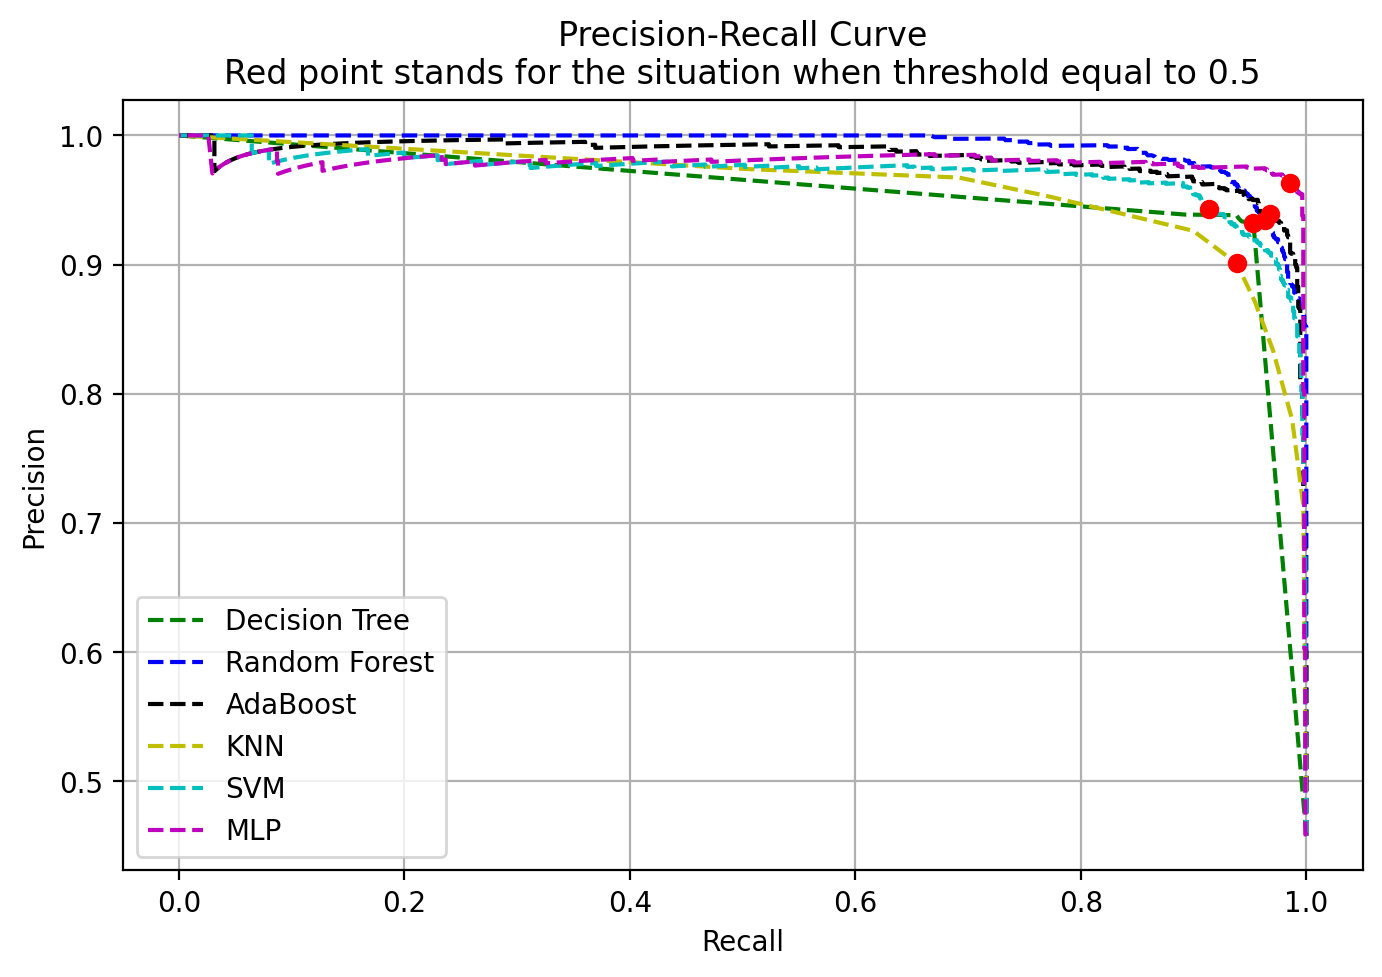

In [156]:
# plot recall vs precision for each model
mpl.style.use('default')
plt.figure(figsize=(8, 5))

styles = {
    'Decision Tree': 'g--',
    'Random Forest': 'b--',
    'AdaBoost': 'k--',
    'KNN': 'y--',
    'SVM': 'c--',
    'MLP': 'm--'
}

for clf_name, y_score in y_scores.items():
    plot_precision_vs_recall(y_score, threshold=classifier_thresholds[clf_name], label=clf_name,
                             style=styles[clf_name])

plt.grid(True)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()

In [157]:
from sklearn.metrics import roc_curve


def plot_roc(y_scores, threshold=0, label=None, style='b-'):
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    plt.plot(fpr, tpr, style, label=label)

    y_pred = y_scores > threshold
    hl_fp = np.sum(np.logical_and(y_pred == True, y_train == 0))
    hl_tp = np.sum(np.logical_and(y_pred == True, y_train == 1))
    hl_fpr = hl_fp / np.sum(y_train == 0)
    hl_tpr = hl_tp / np.sum(y_train == 1)
    plt.plot([hl_fpr], [hl_tpr], 'ro')

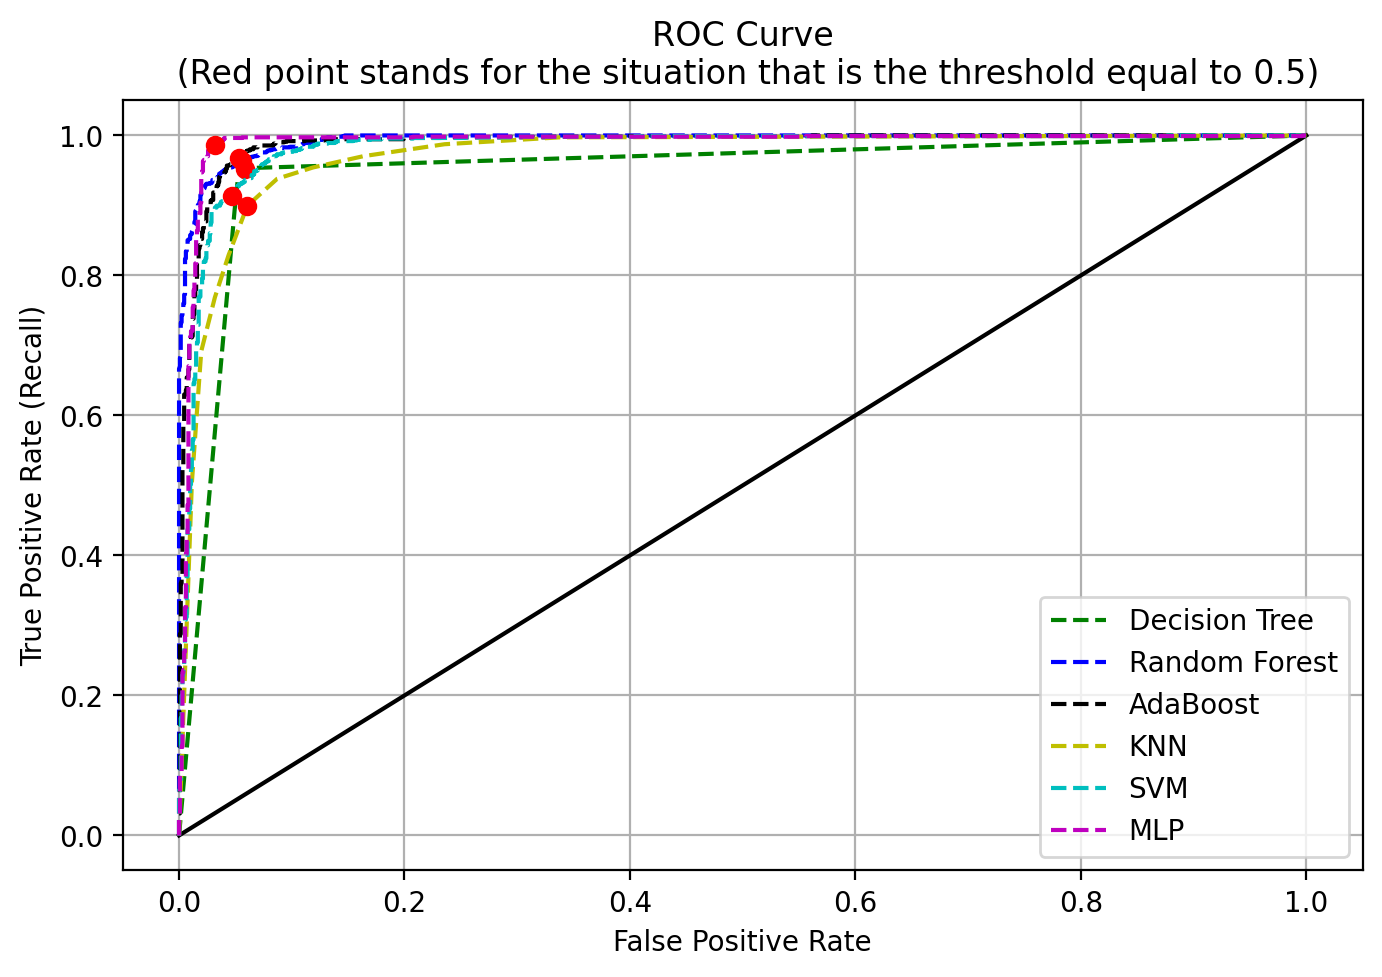

In [158]:
mpl.style.use('default')
plt.figure(figsize=(8, 5))

plt.plot([0, 1], [0, 1], 'black')

for classifier, y_score in y_scores.items():
    plot_roc(y_score, threshold=classifier_thresholds[classifier], label=classifier, style=styles[classifier])

plt.grid(True)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.legend(loc='lower right')
plt.title("ROC Curve\n (Red point stands for the situation that is the threshold equal to 0.5)")
plt.show()

# I saw one result in kaggle of decision tree is about 98%,but my try is only 94%.I think there maybe some data preprocess that need to improve
